In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('CEL SCMission 2024 _ Round 3 _ Data (shareable).xlsx', sheet_name=None)
df_sales = df.get('Sales Order')
df_product = df.get('Product Master')

In [3]:
df_merge = pd.merge(df_sales, df_product, left_on='Product ID', right_on='Product ID', how='left')
df_merge['KG per Pallet']=df_merge['KG per Each']*df_merge['Each Per Carton']*df_merge['Carton Per Pallet']
df_merge['Date'] = pd.to_datetime(df_merge['Date'])
df_merge['Product ID'] = df_merge['Product ID'].astype(str).str.zfill(7)


In [4]:
df_merge.columns

Index(['Date', 'Sales in Country', 'Product ID', 'Quantity in Kg',
       'Product Name', 'Category', 'Sub-Category', 'Base Unit', 'KG per Each',
       'Each Per Carton', 'Carton Per Pallet', 'Shelf Life In Days',
       'Storage Condition', 'Temperature Condition', 'Country of Origin',
       'KG per Pallet'],
      dtype='object')

In [10]:
df_merge['Sales in Country'].unique()

array(['Malaysia', 'Thailand', 'Singapore', 'Philippines', 'Netherlands',
       'France', 'Australia', 'New Zealand'], dtype=object)

In [18]:
df_merge['Markets'] = ''
for i in df_merge['Sales in Country']:
    if i in ['Malaysia', 'Thailand', 'Singapore', 'Philippines']:
        df_merge.loc[df_merge['Sales in Country'] == i, 'Markets'] = 'Southeast Asian'
    elif i in ['Australia', 'New Zealand']:
        df_merge.loc[df_merge['Sales in Country'] == i, 'Markets'] = 'European'
    elif i in ['Netherlands','France']:
        df_merge.loc[df_merge['Sales in Country'] == i, 'Markets'] = 'Oceania'

### Sales Trends

In [5]:
df_merge['Year'] = df_merge['Date'].dt.year
df_merge['Month'] = df_merge['Date'].dt.month
df_merge['Quarter'] = df_merge['Date'].dt.quarter
df_merge.to_excel('output.xlsx', index=False)

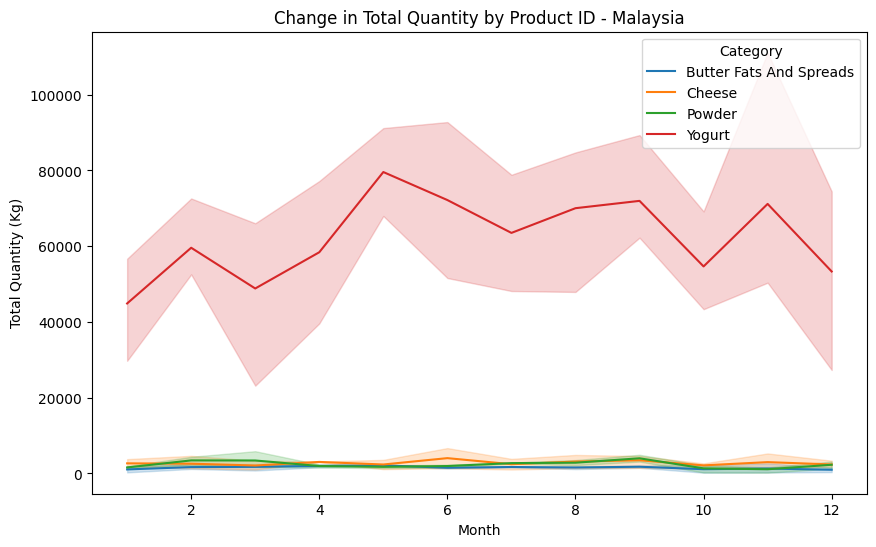

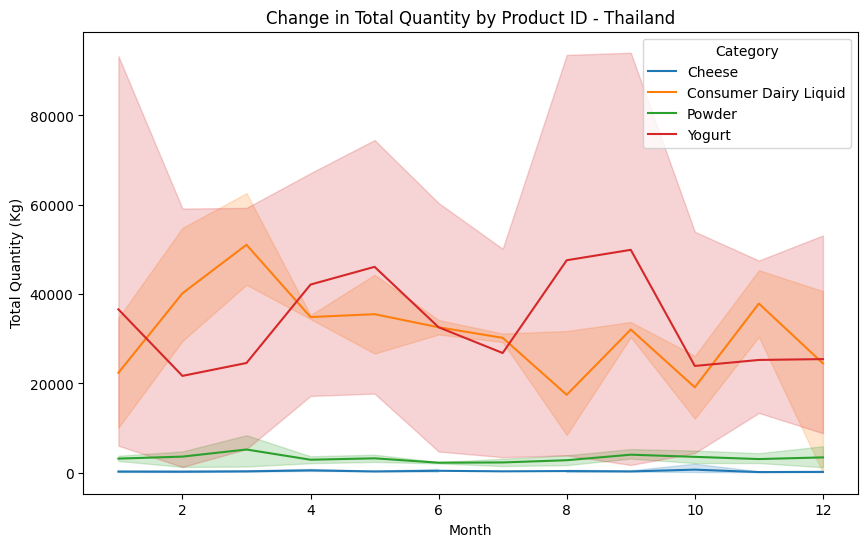

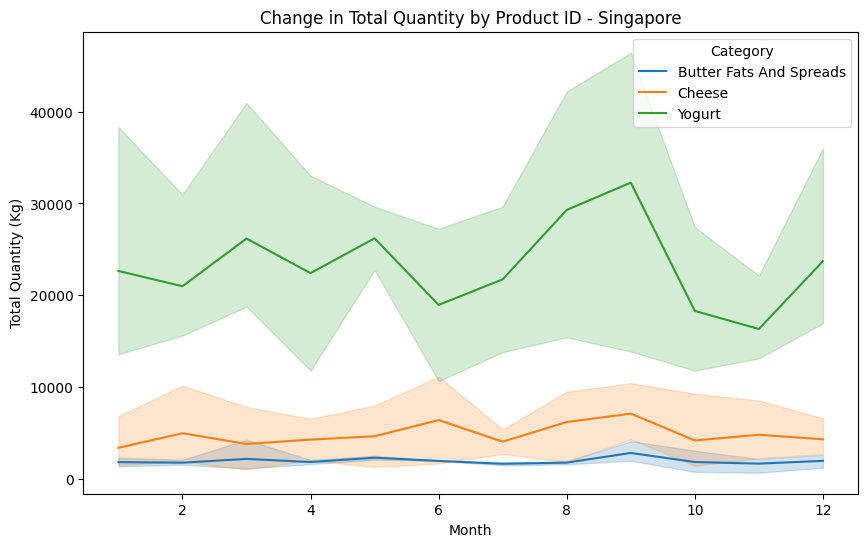

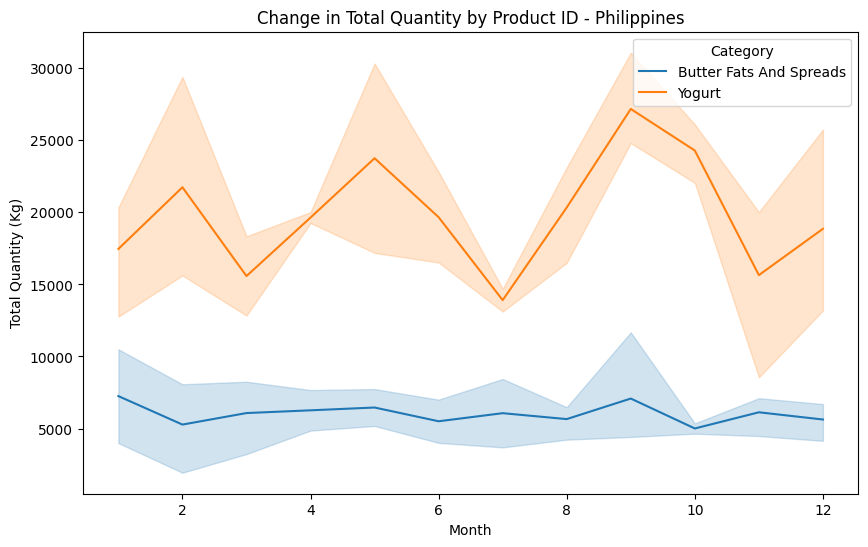

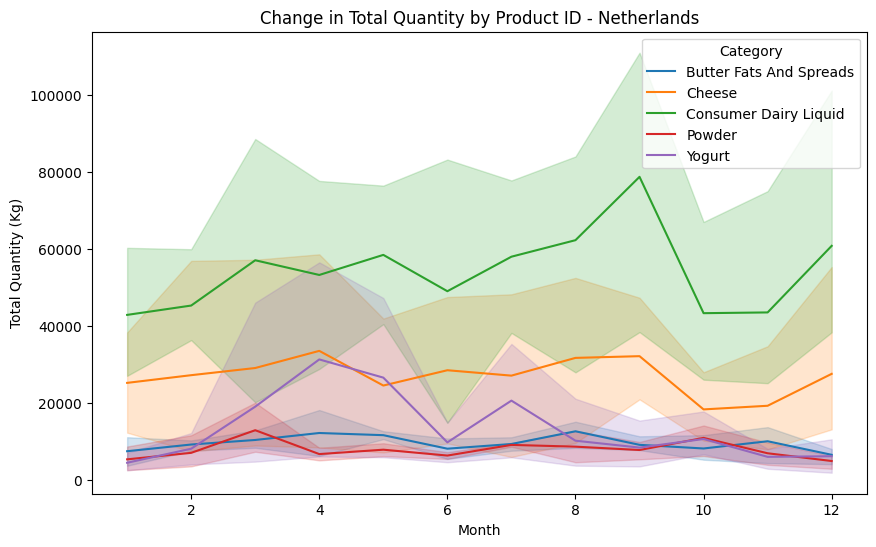

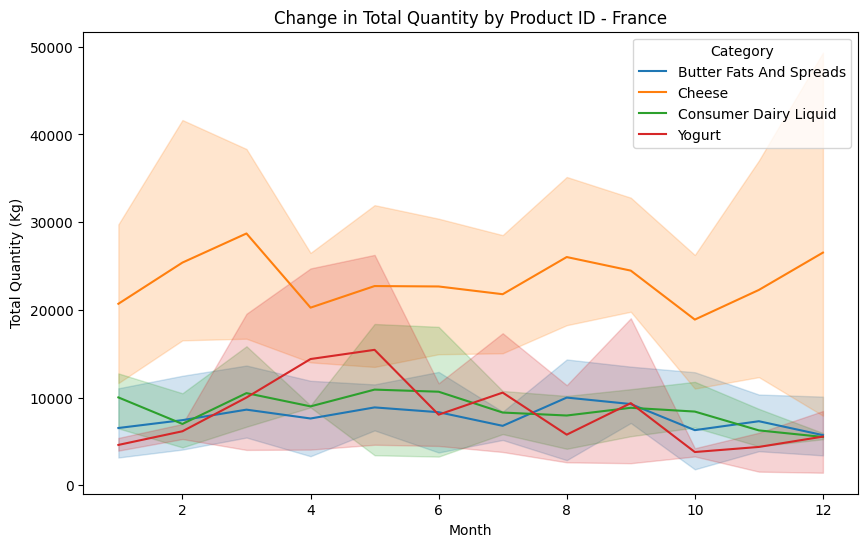

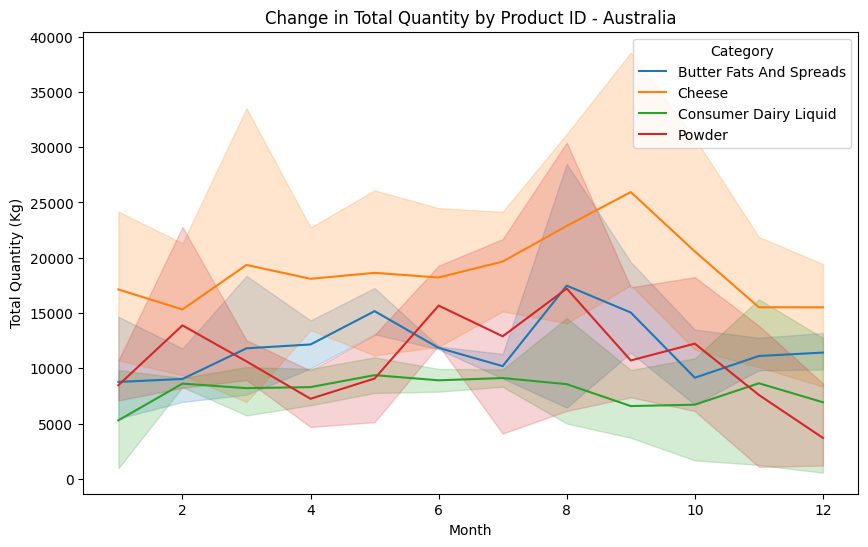

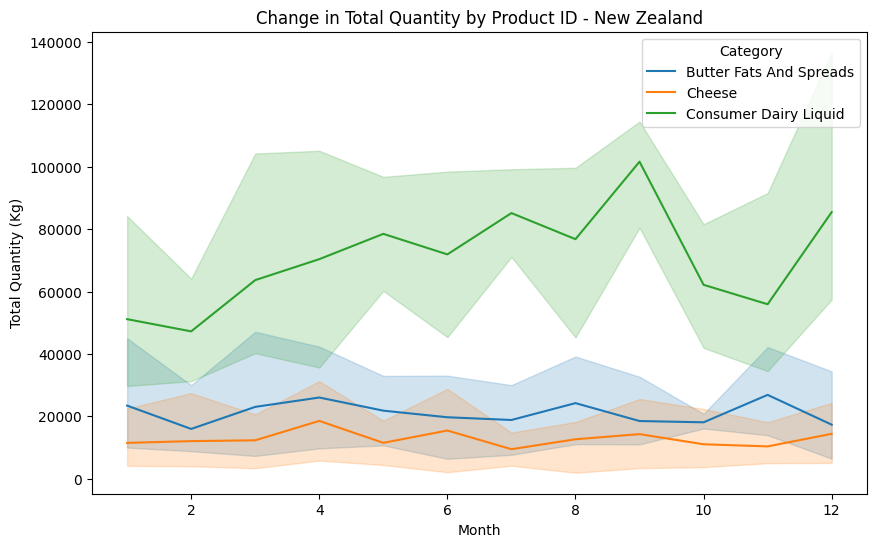

In [6]:
# List of Sales in Country values
sales_countries = df_merge['Sales in Country'].unique()

# Iterate over the Sales in Country values
for country in sales_countries:
    # Filter the data for the current country
    df_country = df_merge[df_merge['Sales in Country'] == country]
    
    # Group the data by year, month, category, and calculate the total quantity
    df_grouped = df_country.groupby(['Year', 'Month', 'Category'])['Quantity in Kg'].sum().reset_index()
    
    # Plot the multi-line graph
    f, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(data=df_grouped, x='Month', y='Quantity in Kg', hue='Category')
    
    # Set the title and labels
    plt.title(f'Change in Total Quantity by Product ID - {country}')
    plt.xlabel('Month')
    plt.ylabel('Total Quantity (Kg)')
    
    # Show the plot
    plt.show()



### Market share

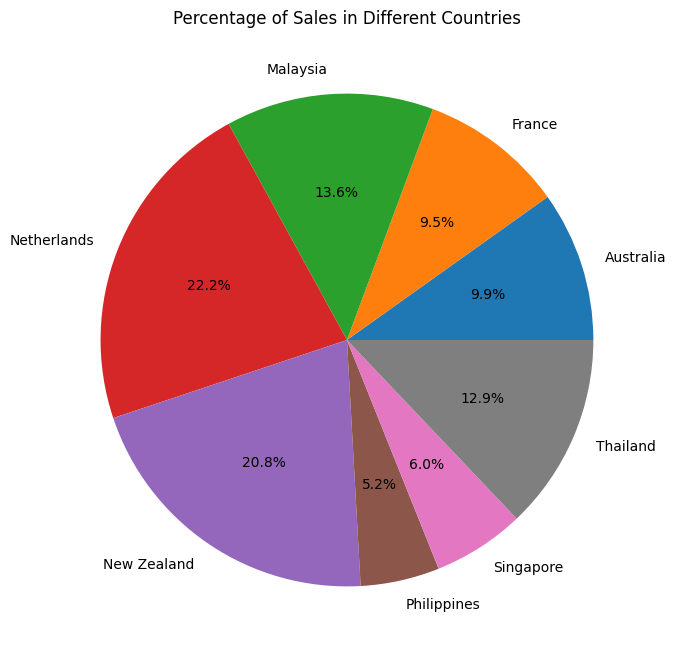

In [7]:
df_market = df_merge.groupby(['Sales in Country'])['Quantity in Kg'].sum().reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(df_market['Quantity in Kg'], labels=df_market['Sales in Country'], autopct='%1.1f%%')
plt.title('Percentage of Sales in Different Countries')
plt.show()
